In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import skew

In [2]:
# Load the dataset
data = pd.read_csv('final_depression_dataset_1.csv')

**BASIC INFORMATION**

In [35]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Name                                   2556 non-null   object 
 1   Gender                                 2556 non-null   object 
 2   Age                                    2556 non-null   int64  
 3   City                                   2556 non-null   object 
 4   Working Professional or Student        2556 non-null   object 
 5   Profession                             1883 non-null   object 
 6   Academic Pressure                      502 non-null    float64
 7   Work Pressure                          2054 non-null   float64
 8   CGPA                                   502 non-null    float64
 9   Study Satisfaction                     502 non-null    float64
 10  Job Satisfaction                       2054 non-null   float64
 11  Slee

In [4]:
print(data.describe())

               Age  Academic Pressure  Work Pressure        CGPA  \
count  2556.000000         502.000000    2054.000000  502.000000   
mean     39.043036           3.003984       3.021908    7.567809   
std      12.260596           1.390007       1.417312    1.465367   
min      18.000000           1.000000       1.000000    5.030000   
25%      28.000000           2.000000       2.000000    6.210000   
50%      39.000000           3.000000       3.000000    7.605000   
75%      50.000000           4.000000       4.000000    8.825000   
max      60.000000           5.000000       5.000000   10.000000   

       Study Satisfaction  Job Satisfaction  Work/Study Hours  \
count          502.000000       2054.000000       2556.000000   
mean             3.075697          3.015093          6.023865   
std              1.373490          1.418432          3.771743   
min              1.000000          1.000000          0.000000   
25%              2.000000          2.000000          3.000000 

**DATA VISUALIZATION**

In [5]:
# Set the style for better visualization
sns.set(style="whitegrid")

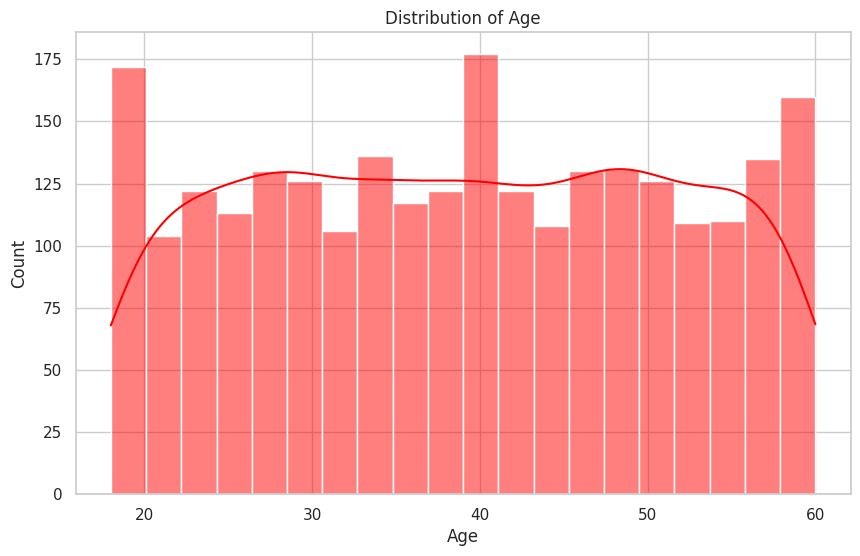

In [37]:
#Histogram: Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='red')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

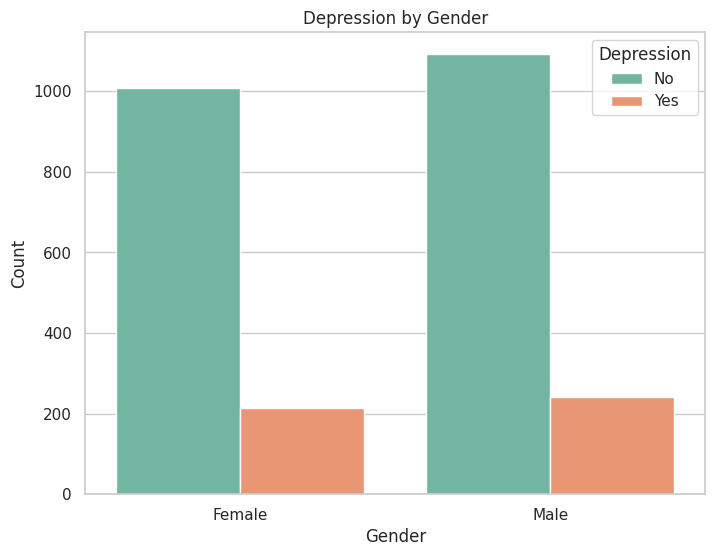

In [7]:
#Bar Plot: Depression by Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Depression', data=data, palette='Set2')
plt.title('Depression by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Depression')
plt.show()

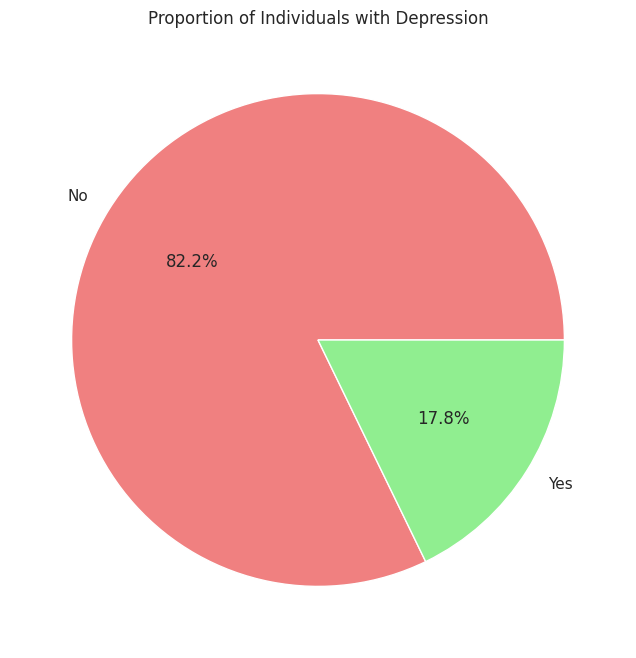

In [8]:
# Pie Chart: Proportion of Depression
depression_counts = data['Depression'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(depression_counts, labels=depression_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Proportion of Individuals with Depression')
plt.show()

**DISTRIBUTION ANALYSIS**

In [12]:
# Value Ranges for Numerical Columns
numerical_cols = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Work/Study Hours', 'Financial Stress']
print("Value Ranges for Numerical Columns:")
for col in numerical_cols:
    if col in data.columns:
        min_val = data[col].min()
        max_val = data[col].max()
        print(f"{col}: Min = {min_val}, Max = {max_val}, Range = {max_val - min_val}")

Value Ranges for Numerical Columns:
Age: Min = 18, Max = 60, Range = 42
Academic Pressure: Min = 1.0, Max = 5.0, Range = 4.0
Work Pressure: Min = 1.0, Max = 5.0, Range = 4.0
CGPA: Min = 5.03, Max = 10.0, Range = 4.97
Work/Study Hours: Min = 0, Max = 12, Range = 12
Financial Stress: Min = 1, Max = 5, Range = 4


In [42]:
# Outlier Detection using IQR
def detect_outliers(df, column):
    if column in df.columns and df[column].notna().any():
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        return len(outliers)
    return 0

print("\nNumber of Outliers in Numerical Columns:")
for col in numerical_cols:
    outlier_count = detect_outliers(data, col)
    print(f"{col}: {outlier_count} outliers")


Number of Outliers in Numerical Columns:
Age: 0 outliers
Academic Pressure: 0 outliers
Work Pressure: 0 outliers
CGPA: 0 outliers
Work/Study Hours: 0 outliers
Financial Stress: 0 outliers
Study Satisfaction: 0 outliers
Job Satisfaction: 0 outliers


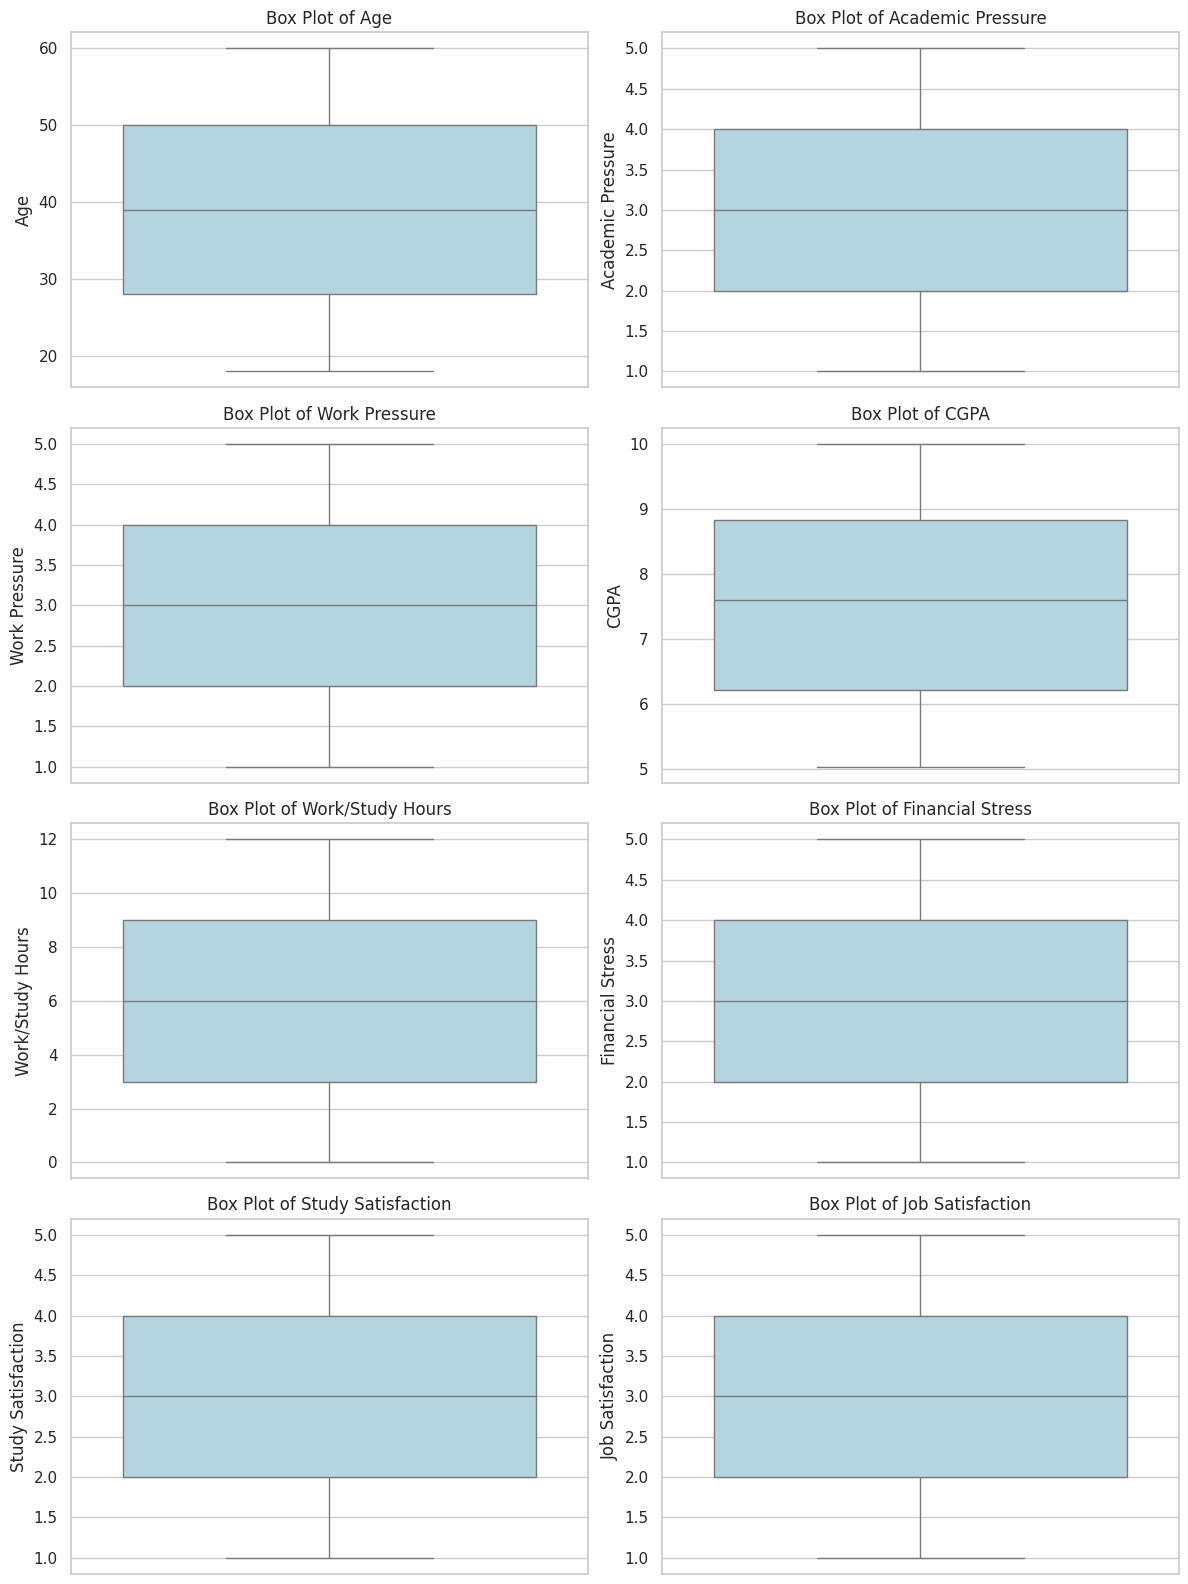

In [44]:
#Visualizations for Outliers (Box Plots)
plt.figure(figsize=(12, 16)) # Adjusted figure size for more rows
numerical_cols = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Work/Study Hours', 'Financial Stress', 'Study Satisfaction', 'Job Satisfaction'] # Include Study Satisfaction and Job Satisfaction
for i, col in enumerate(numerical_cols, 1):
    if col in data.columns and data[col].notna().any():
        plt.subplot(4, 2, i) # Changed layout to 4 rows, 2 columns
        sns.boxplot(y=data[col], color='lightblue')
        plt.title(f'Box Plot of {col}')
        plt.ylabel(col)
plt.tight_layout()
plt.savefig('OUTLIERS.png', dpi=300)
plt.show()

In [15]:
# Skewness Calculation
print("\nSkewness of Numerical Columns:")
for col in numerical_cols:
    if col in data.columns and data[col].notna().any():
        skewness = skew(data[col].dropna())
        print(f"{col}: Skewness = {skewness:.3f}")


Skewness of Numerical Columns:
Age: Skewness = -0.005
Academic Pressure: Skewness = -0.012
Work Pressure: Skewness = -0.015
CGPA: Skewness = -0.031
Work/Study Hours: Skewness = -0.018
Financial Stress: Skewness = 0.042


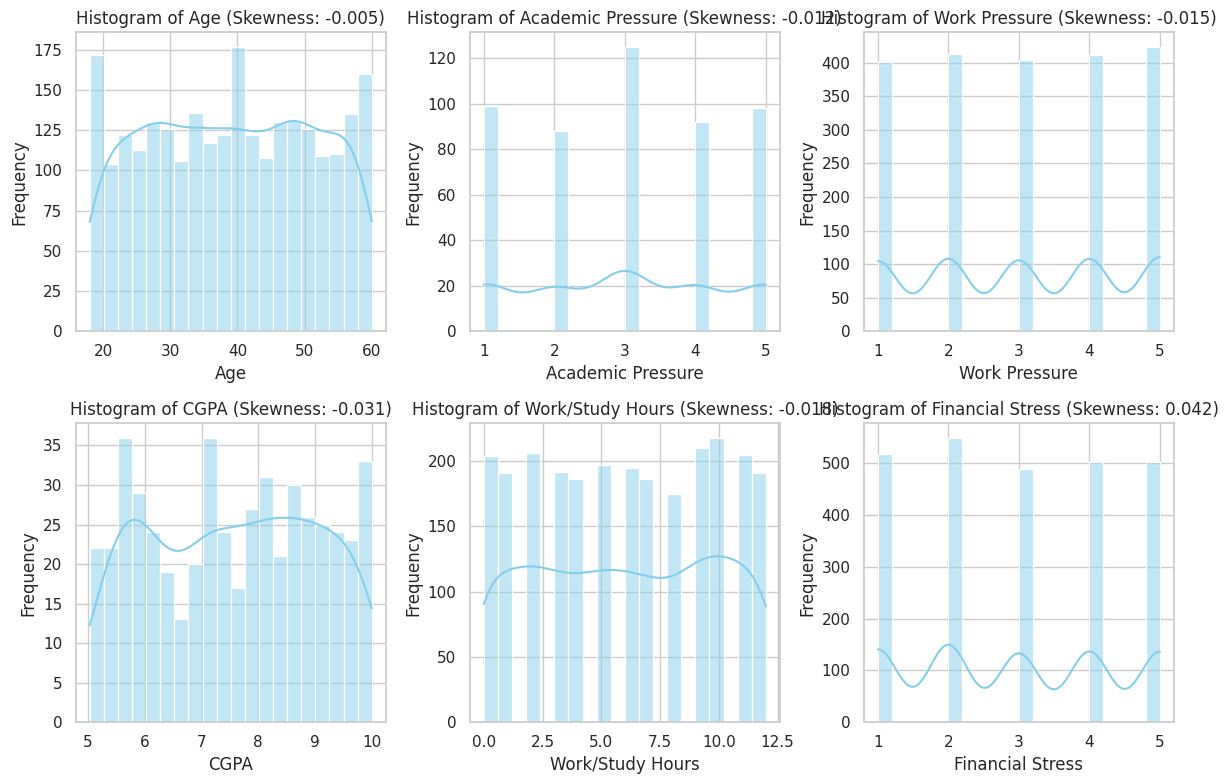

In [16]:
#Visualizations for Skewness (Histograms with KDE)
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    if col in data.columns and data[col].notna().any():
        plt.subplot(2, 3, i)
        sns.histplot(data[col].dropna(), bins=20, kde=True, color='skyblue')
        plt.title(f'Histogram of {col} (Skewness: {skew(data[col].dropna()):.3f})')
        plt.xlabel(col)
        plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**CLASS BALANCE AND CATEGORY DISTRIBUTION**

/tmp/ipython-input-17-3185410459.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Depression', data=data, palette='Set2')


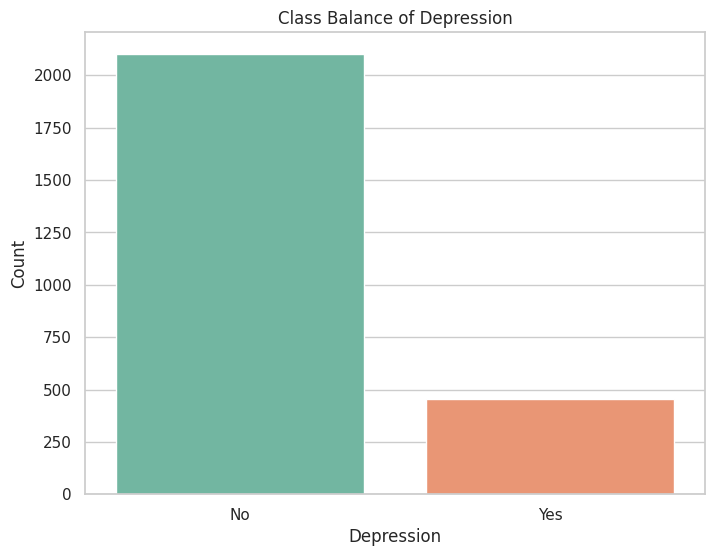


Class Balance of Depression:
Depression
No     82.198748
Yes    17.801252
Name: proportion, dtype: float64


In [17]:
#Class Balance for Depression (Target Variable)
plt.figure(figsize=(8, 6))
sns.countplot(x='Depression', data=data, palette='Set2')
plt.title('Class Balance of Depression')
plt.xlabel('Depression')
plt.ylabel('Count')
plt.show()
print("\nClass Balance of Depression:")
print(data['Depression'].value_counts(normalize=True) * 100)

/tmp/ipython-input-18-575550613.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set1')
/tmp/ipython-input-18-575550613.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set1')
/tmp/ipython-input-18-575550613.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set1')
/tmp/ipython-input-18-575550613.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `le

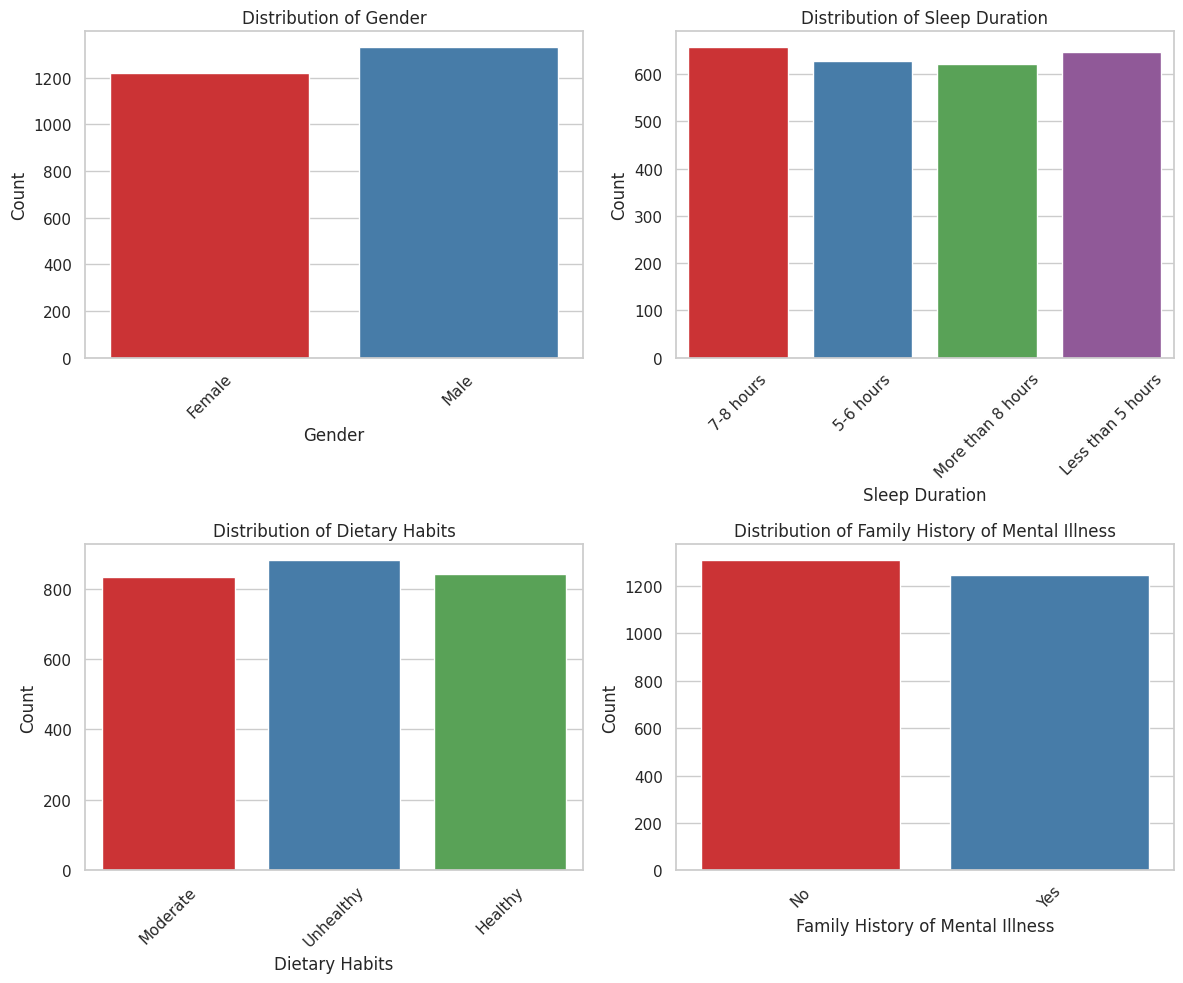


Distribution of Gender:
Gender
Male      52.1518
Female    47.8482
Name: proportion, dtype: float64

Distribution of Sleep Duration:
Sleep Duration
7-8 hours            25.743349
Less than 5 hours    25.352113
5-6 hours            24.569640
More than 8 hours    24.334898
Name: proportion, dtype: float64

Distribution of Dietary Habits:
Dietary Habits
Unhealthy    34.507042
Healthy      32.942097
Moderate     32.550861
Name: proportion, dtype: float64

Distribution of Family History of Mental Illness:
Family History of Mental Illness
No     51.29108
Yes    48.70892
Name: proportion, dtype: float64


In [18]:
# Category Distribution for Categorical Variables
categorical_cols = ['Gender', 'Sleep Duration', 'Dietary Habits', 'Family History of Mental Illness']
plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, data=data, palette='Set1')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print category distributions
for col in categorical_cols:
    print(f"\nDistribution of {col}:")
    print(data[col].value_counts(normalize=True) * 100)

**CORRELATION HEATMAP**

Dataset size after dropping NaN: 2556 rows

Checking for NaN in Correlation Matrix:
Gender                                   0
Age                                      0
Working Professional or Student          0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


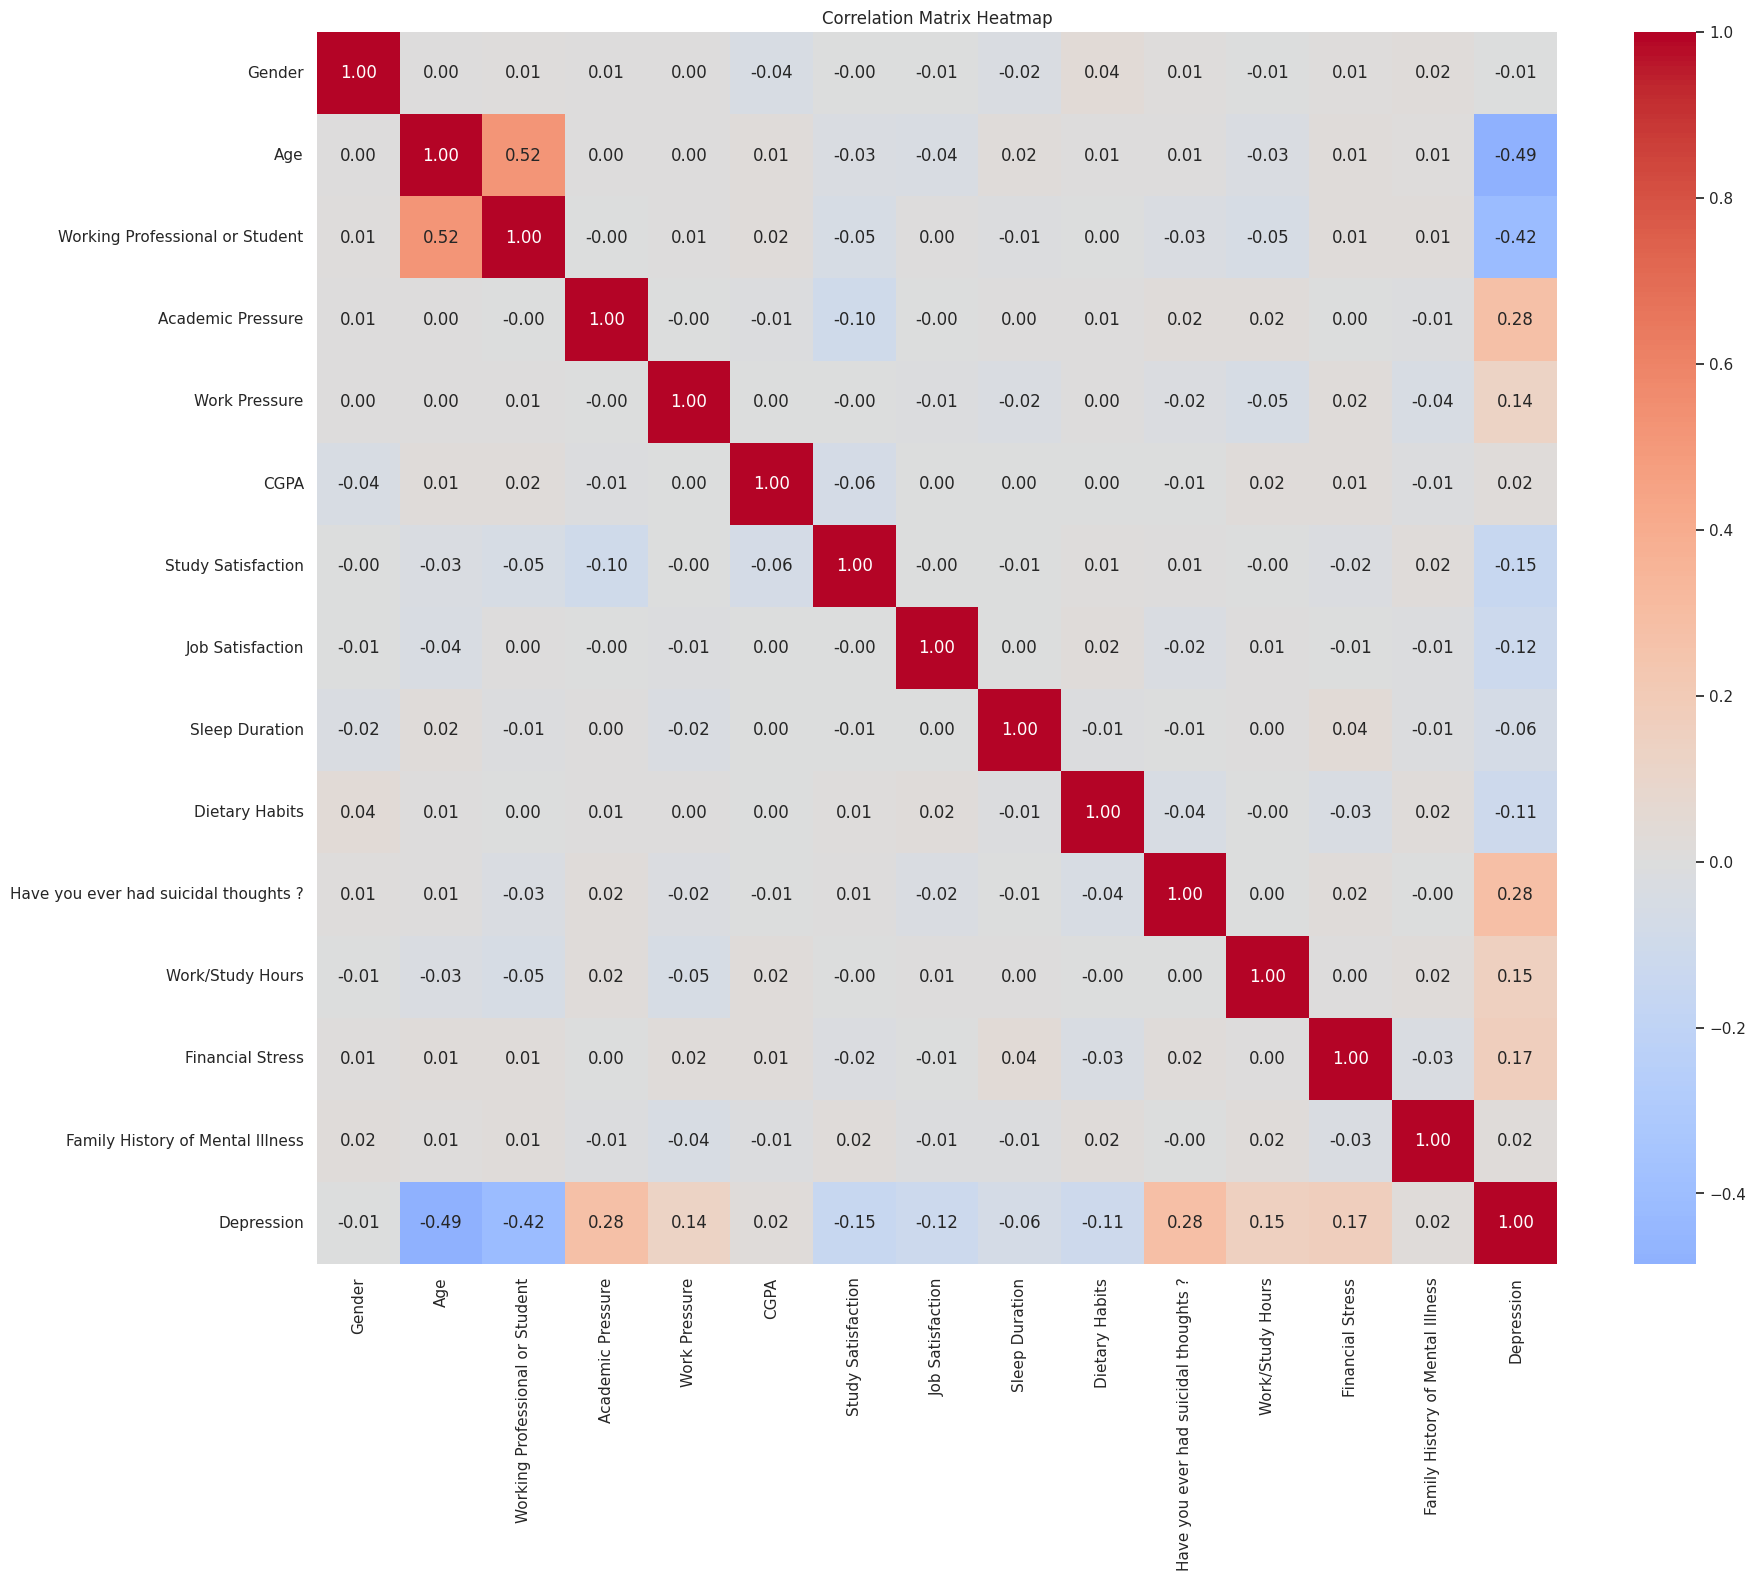


Correlation Matrix (Subset with Depression):
Depression                               1.000000
Have you ever had suicidal thoughts ?    0.281669
Academic Pressure                        0.276958
Financial Stress                         0.165669
Work/Study Hours                         0.152465
Work Pressure                            0.135261
Family History of Mental Illness         0.019182
CGPA                                     0.016334
Gender                                  -0.007595
Sleep Duration                          -0.062574
Dietary Habits                          -0.108215
Job Satisfaction                        -0.118686
Study Satisfaction                      -0.149117
Working Professional or Student         -0.418708
Age                                     -0.485147
Name: Depression, dtype: float64

Explanation of Relationships Based on Correlation Matrix:
Focusing on correlations with Depression (Target Variable):
Depression vs Gender: Correlation = -0.008 (weak)
De

In [45]:
# Create a copy of the dataset for encoding
data_encoded = data.copy()

# Drop 'Name' as it is a unique identifier with no analytical value
data_encoded = data_encoded.drop(columns=['Name'])

# Encode binary categorical variables
data_encoded['Depression'] = data_encoded['Depression'].map({'Yes': 1, 'No': 0})
data_encoded['Family History of Mental Illness'] = data_encoded['Family History of Mental Illness'].map({'Yes': 1, 'No': 0})
data_encoded['Have you ever had suicidal thoughts ?'] = data_encoded['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0})
data_encoded['Gender'] = data_encoded['Gender'].map({'Male': 0, 'Female': 1})
data_encoded['Working Professional or Student'] = data_encoded['Working Professional or Student'].map({'Student': 0, 'Working Professional': 1})

# Encode ordinal categorical variables
sleep_duration_map = {
    'Less than 5 hours': 1,
    '5-6 hours': 2,
    '7-8 hours': 3,
    'More than 8 hours': 4
}
data_encoded['Sleep Duration'] = data_encoded['Sleep Duration'].map(sleep_duration_map)

dietary_habits_map = {
    'Unhealthy': 1,
    'Moderate': 2,
    'Healthy': 3
}
data_encoded['Dietary Habits'] = data_encoded['Dietary Habits'].map(dietary_habits_map)

# One-hot encode nominal categorical variables
nominal_cols = ['City', 'Profession', 'Degree']
data_encoded = pd.get_dummies(data_encoded, columns=nominal_cols, prefix=nominal_cols, dummy_na=False)

# Handle missing data: Fill NaN with median for numerical columns
numerical_cols = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Work/Study Hours', 'Financial Stress', 'Study Satisfaction', 'Job Satisfaction']
for col in numerical_cols:
    if col in data_encoded.columns:
        data_encoded[col] = data_encoded[col].fillna(data_encoded[col].median())

# Select all columns for correlation analysis (excluding any remaining non-numerical columns)
correlation_cols = [col for col in data_encoded.columns if data_encoded[col].dtype in ['int64', 'float64', 'uint8']]

# Filter out rows with missing values for encoded categorical columns
data_subset = data_encoded[correlation_cols].dropna()

# Check dataset size after preprocessing
print(f"Dataset size after dropping NaN: {data_subset.shape[0]} rows")

# Calculate correlation matrix
correlation_matrix = data_subset.corr()

# Check for NaN in correlation matrix
print("\nChecking for NaN in Correlation Matrix:")
print(correlation_matrix.isna().sum())

# Plot heatmap for all features with annotations
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=correlation_matrix.min().min(), vmax=correlation_matrix.max().max(), center=0, annot_kws={'size': 12})
plt.title('Correlation Matrix Heatmap')
plt.savefig('heatmap.png', dpi=300)  # Save high-resolution file
plt.show()

# Plot heatmap for a subset of key features for better readability
key_features = [
    'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Work/Study Hours',
    'Financial Stress', 'Study Satisfaction', 'Job Satisfaction', 'Depression',
    'Family History of Mental Illness', 'Have you ever had suicidal thoughts ?',
    'Gender', 'Sleep Duration', 'Dietary Habits'
]
key_features = [col for col in key_features if col in correlation_cols]  # Ensure columns exist
correlation_matrix_subset = data_subset[key_features].corr()

# Print correlation matrix (subset with Depression for readability)
print("\nCorrelation Matrix (Subset with Depression):")
print(correlation_matrix['Depression'].sort_values(ascending=False))

# Explanation of relationships
print("\nExplanation of Relationships Based on Correlation Matrix:")
print("Focusing on correlations with Depression (Target Variable):")
for col in correlation_cols:
    if col != 'Depression':
        corr_value = correlation_matrix.loc[col, 'Depression']
        if np.isnan(corr_value):
            print(f"Depression vs {col}: Correlation = NaN (insufficient data)")
        else:
            if abs(corr_value) >= 0.5:
                strength = "strong"
            elif abs(corr_value) >= 0.3:
                strength = "moderate"
            else:
                strength = "weak"
            print(f"Depression vs {col}: Correlation = {corr_value:.3f} ({strength})")

print("\nNotable Relationships Between Other Features:")
for col1 in correlation_cols:
    for col2 in correlation_cols:
        if col1 < col2 and col1 != 'Depression' and col2 != 'Depression':
            corr_value = correlation_matrix.loc[col1, col2]
            if np.isnan(corr_value):
                continue
            if abs(corr_value) >= 0.3:  # Highlight moderate to strong correlations
                strength = "strong" if abs(corr_value) >= 0.5 else "moderate"
                print(f"{col1} vs {col2}: Correlation = {corr_value:.3f} ({strength})")